In [ ]:
%cd '/content/drive/My Drive/ML/CS114.K21.KHTN/Final'

/content/drive/My Drive/ML/CS114.K21.KHTN/Final


#**5. Train, đánh giá và lưu model sklearn**

##**5.1 Model Sklearn**

####**Import các thư viện cần thiết**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score,f1_score
import matplotlib.pyplot as plt

import joblib
import pickle
import h5py
import numpy as np
import os
import glob
import cv2

###**5.1.1 Vector normal**

In [ ]:
train_normal = 'H5PY/train/train_normal.h5'
train_label = 'H5PY/train/labels_train.h5'

In [ ]:
h5f_train = h5py.File(train_normal, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [ ]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_train.close()
h5f_labels.close()

In [ ]:
data.shape

(13720, 3072)

In [ ]:
# create models sklearn
models = []
models.append(LogisticRegression(random_state=42,max_iter=100000))
models.append(DecisionTreeClassifier(random_state=42))
models.append(KNeighborsClassifier())
models.append(GaussianNB())
models.append(SVC(random_state=42,max_iter=100000))

In [ ]:
results_accuracy = [[] for _ in range(len(models))]
results_f1 = [[] for _ in range(len(models))]
names = ['' for _ in range(len(models))]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models)):
        model = models[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


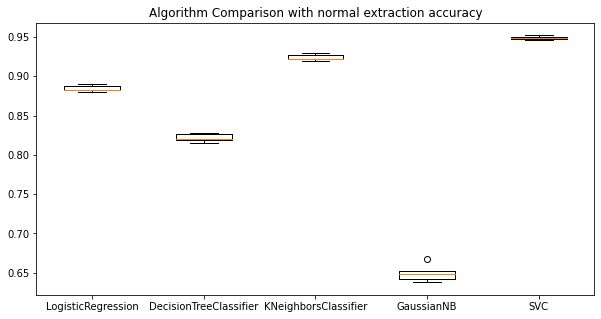

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with normal extraction accuracy')
plt.show()

In [ ]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.8844023323615161 (0.0036834631978114366)
DecisionTreeClassifier: 0.8215014577259476 (0.004697633540618691)
KNeighborsClassifier: 0.9242711370262391 (0.0038388320939544214)
GaussianNB: 0.6494169096209912 (0.010346260617039645)
SVC: 0.9487609329446064 (0.0019773556802114693)


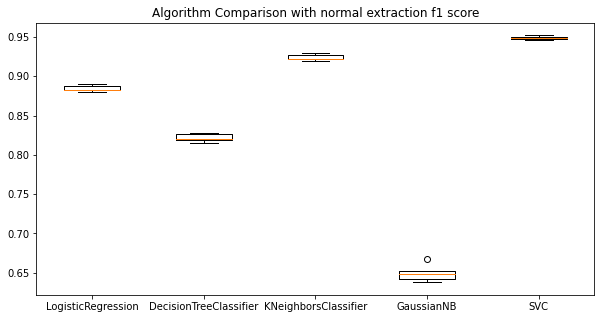

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with normal extraction f1 score')
plt.show()

In [ ]:
score_f1 = np.array(results_f1)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.8844023323615161 (0.003683463197811461)
DecisionTreeClassifier: 0.8215014577259476 (0.004697633540618719)
KNeighborsClassifier: 0.9242711370262391 (0.0038388320939544214)
GaussianNB: 0.6494169096209912 (0.010346260617039645)
SVC: 0.9487609329446064 (0.0019773556802114584)


In [ ]:
model_path = 'H5PY/model/svm_normal.sav'

In [ ]:
joblib.dump(models[4], model_path)

['H5PY/model/svm_normal.sav']

###**5.1.2 Vector local binary patterns** 

In [ ]:
train_lbps = 'H5PY/train/train_lbps.h5'
train_label = 'H5PY/train/labels_train.h5'

In [ ]:
h5f_train = h5py.File(train_lbps, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [ ]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_train.close()
h5f_labels.close()

In [ ]:
data.shape

(13720, 26)

In [ ]:
# create models sklearn
models_lbps = []
models_lbps.append(LogisticRegression(random_state=42,max_iter=100000))
models_lbps.append(DecisionTreeClassifier(random_state=42))
models_lbps.append(KNeighborsClassifier())
models_lbps.append(GaussianNB())
models_lbps.append(SVC(random_state=42,max_iter=100000))

In [ ]:
results_accuracy = [[] for _ in range(len(models_lbps))]
results_f1 = [[] for _ in range(len(models_lbps))]
names = ['' for _ in range(len(models_lbps))]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_lbps)):
        model = models_lbps[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


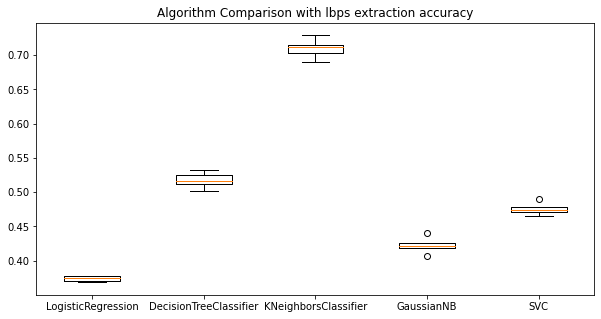

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with lbps extraction accuracy')
plt.show()

In [ ]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.37339650145772596 (0.003770413165124653)
DecisionTreeClassifier: 0.517201166180758 (0.010357550622560056)
KNeighborsClassifier: 0.7098396501457724 (0.012731965688821185)
GaussianNB: 0.42274052478134105 (0.011223069843166995)
SVC: 0.4759475218658892 (0.008242921441762061)


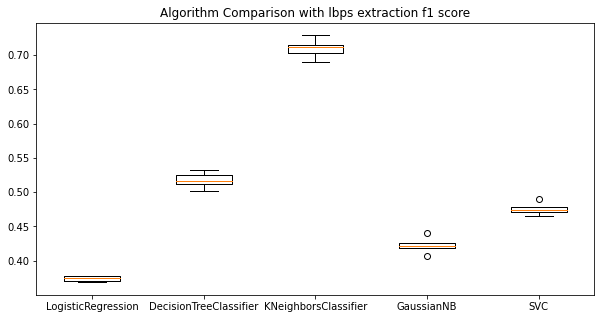

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with lbps extraction f1 score')
plt.show()

In [ ]:
score_f1 = np.array(results_f1)
for i in range(len(models_lbps)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.37339650145772596 (0.003770413165124663)
DecisionTreeClassifier: 0.517201166180758 (0.010357550622560056)
KNeighborsClassifier: 0.7098396501457724 (0.012731965688821185)
GaussianNB: 0.42274052478134105 (0.011223069843166995)
SVC: 0.4759475218658892 (0.008242921441762061)


In [ ]:
model_path = 'H5PY/model/knn_lbps.sav'

In [ ]:
joblib.dump(models_lbps[2], model_path)

['H5PY/model/knn_lbps.sav']

###**5.1.3 Vector histogram**

In [ ]:
train_hog = 'H5PY/train/train_hog.h5'
train_label = 'H5PY/train/labels_train.h5'

In [ ]:
h5f_train = h5py.File(train_hog, 'r')
h5f_labels = h5py.File(train_label, 'r')

In [ ]:
data = h5f_train['dataset']
labels = h5f_labels['dataset']

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
h5f_train.close()
h5f_labels.close()

In [ ]:
data.shape

(13720, 144)

In [ ]:
# create models sklearn
models_hog = []
models_hog.append(LogisticRegression(random_state=42,max_iter=100000))
models_hog.append(DecisionTreeClassifier(random_state=42))
models_hog.append(KNeighborsClassifier())
models_hog.append(GaussianNB())
models_hog.append(SVC(random_state=42,max_iter=100000))

In [ ]:
results_accuracy = [[] for _ in range(len(models_hog))]
results_f1 = [[] for _ in range(len(models_hog))]
names = ['' for _ in range(len(models_hog))]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, val_idx in skf.split(data,labels):
    train_X, val_X = data[train_idx], data[val_idx]
    train_Y, val_Y = labels[train_idx], labels[val_idx]
    for i in range(len(models_hog)):
        model = models_hog[i]
        
        model.fit(train_X, train_Y)
        pred = model.predict(val_X)

        score_accuracy = accuracy_score(val_Y, pred)
        score_f1 = f1_score(val_Y,pred, average='micro')

        results_accuracy[i].append(score_accuracy)
        results_f1[i].append(score_f1)
        names[i] = model.__class__.__name__


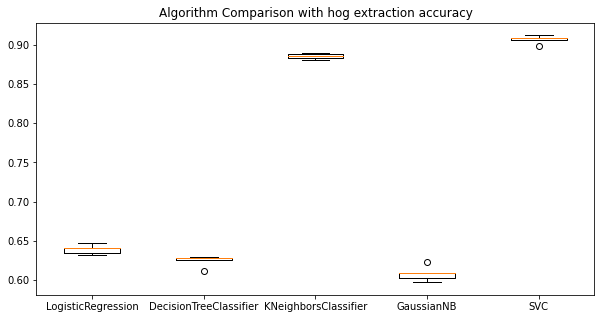

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_accuracy,labels=names)
plt.title('Algorithm Comparison with hog extraction accuracy')
plt.show()

In [ ]:
score_accuracy = np.array(results_accuracy)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_accuracy[i].mean(),score_accuracy[i].std()))

LogisticRegression: 0.63899416909621 (0.005452362743225951)
DecisionTreeClassifier: 0.6244169096209913 (0.006761554602512618)
KNeighborsClassifier: 0.8854956268221574 (0.0031552275250602657)
GaussianNB: 0.6079446064139942 (0.008652926649012845)
SVC: 0.9069241982507288 (0.004413083237090554)


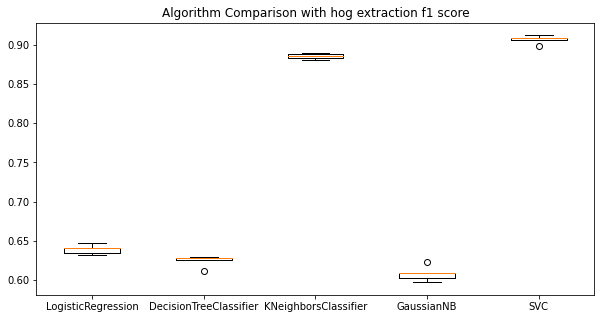

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(results_f1,labels=names)
plt.title('Algorithm Comparison with hog extraction f1 score')
plt.show()

In [ ]:
score_f1 = np.array(results_f1)
for i in range(len(models_hog)): 
    print('{}: {} ({})'.format(names[i],score_f1[i].mean(),score_f1[i].std()))

LogisticRegression: 0.63899416909621 (0.005452362743225951)
DecisionTreeClassifier: 0.6244169096209913 (0.006761554602512618)
KNeighborsClassifier: 0.8854956268221574 (0.003155227525060275)
GaussianNB: 0.6079446064139942 (0.008652926649012845)
SVC: 0.9069241982507288 (0.004413083237090554)


In [ ]:
model_path = 'H5PY/model/svm_hog.sav'

In [ ]:
joblib.dump(models_hog[4], model_path)

['H5PY/model/svm_hog.sav']

##**5.2 Model cnn**

###**5.2.1 Mạng Shallow (mạng 2 lớp)**

In [ ]:
!python3 shallownet_train.py --output image/image_shallownet.png --model H5PY/model/shallownet_weights.hdf5

Using TensorFlow backend.
2020-07-30 19:14:14.547798: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
[INFO] compiling model...
2020-07-30 19:14:17.586807: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 19:14:17.603805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-30 19:14:17.604538: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-30 19:14:17.604600: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-07-30 19:14:1

###**5.2.2 Mạng Lenet**

In [ ]:
!python3 lenet_train.py --output image/image_lenet.png --model H5PY/model/lenet_weights.hdf5

Using TensorFlow backend.
2020-07-30 19:30:29.957712: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
(13720, 32, 32, 3)
[INFO] compiling model...
2020-07-30 19:30:32.919348: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-07-30 19:30:32.922942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-07-30 19:30:32.923923: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-07-30 19:30:32.923984: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1